In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataAir_dindang.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1698 non-null   float64       
 2   co                1714 non-null   float64       
 3   no                1713 non-null   float64       
 4   no2               1713 non-null   float64       
 5   nox               1712 non-null   float64       
 6   pm25              1028 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [7]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [8]:
data=data.dropna()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
736,2020-01-07,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0
737,2020-01-08,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0
738,2020-01-09,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0
739,2020-01-10,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0
740,2020-01-11,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2022-10-26,84.0,0.90,35.98,40.60,76.59,31.0,30.3,69,1009.24,110.0,7.0
1760,2022-10-27,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0


In [9]:
y_col='pm25'

In [10]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2020-01-07,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0
1,2020-01-08,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0
2,2020-01-09,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0
3,2020-01-10,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0
4,2020-01-11,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2022-10-26,84.0,0.90,35.98,40.60,76.59,31.0,30.3,69,1009.24,110.0,7.0
1009,2022-10-27,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0
1010,2022-10-28,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0
1011,2022-10-29,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0


In [11]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [12]:
date_parts(data)

In [13]:
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name
0,2020-01-07,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0,2020,1,7,Tuesday
1,2020-01-08,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0,2020,1,8,Wednesday
2,2020-01-09,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0,2020,1,9,Thursday
3,2020-01-10,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0,2020,1,10,Friday
4,2020-01-11,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0,2020,1,11,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2022-10-26,84.0,0.90,35.98,40.60,76.59,31.0,30.3,69,1009.24,110.0,7.0,2022,10,26,Wednesday
1009,2022-10-27,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0,2022,10,27,Thursday
1010,2022-10-28,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0,2022,10,28,Friday
1011,2022-10-29,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0,2022,10,29,Saturday


In [14]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [15]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2020-01-07,2020,1,7,Tuesday,33.0
1,2020-01-08,2020,1,8,Wednesday,47.0
2,2020-01-09,2020,1,9,Thursday,49.0
3,2020-01-10,2020,1,10,Friday,80.0
4,2020-01-11,2020,1,11,Saturday,43.0
...,...,...,...,...,...,...
1008,2022-10-26,2022,10,26,Wednesday,31.0
1009,2022-10-27,2022,10,27,Thursday,16.0
1010,2022-10-28,2022,10,28,Friday,19.0
1011,2022-10-29,2022,10,29,Saturday,20.0


In [16]:
df=df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2020-01-07,2020,1,7,Tuesday,33.0
2020-01-08,2020,1,8,Wednesday,47.0
2020-01-09,2020,1,9,Thursday,49.0
2020-01-10,2020,1,10,Friday,80.0
2020-01-11,2020,1,11,Saturday,43.0
...,...,...,...,...,...
2022-10-26,2022,10,26,Wednesday,31.0
2022-10-27,2022,10,27,Thursday,16.0
2022-10-28,2022,10,28,Friday,19.0


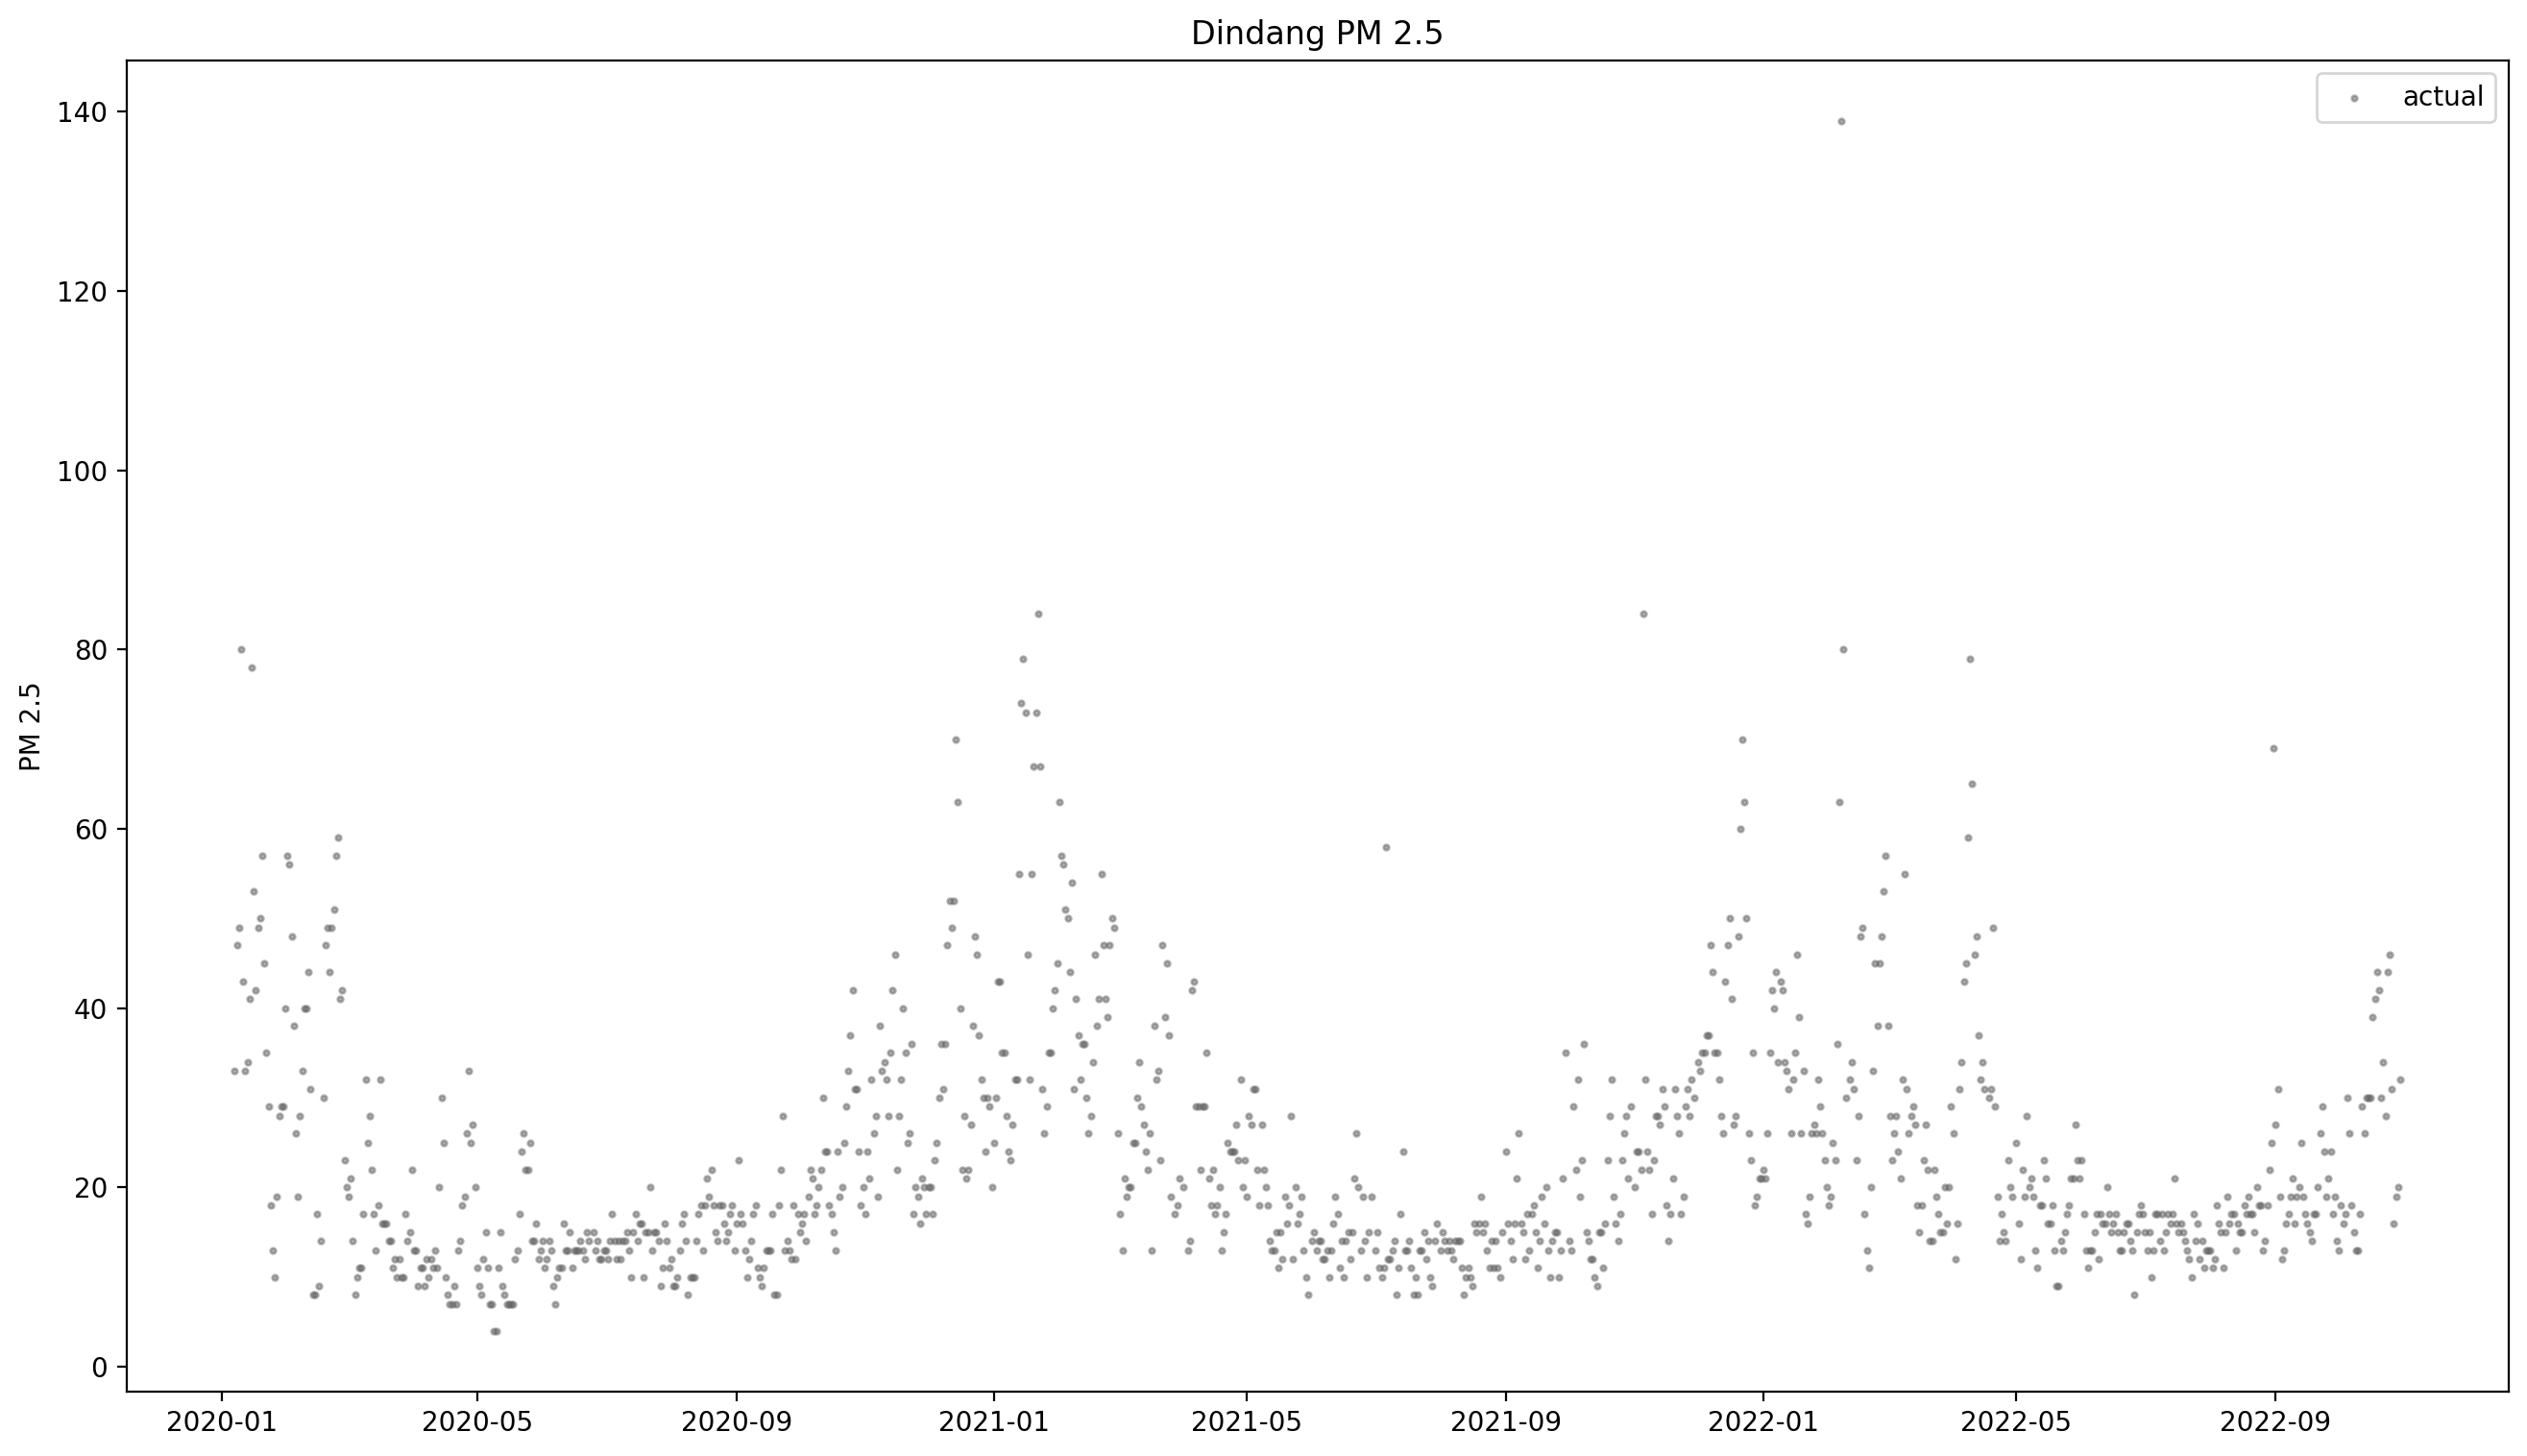

In [18]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Dindang PM 2.5')
plt.legend();

In [19]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [20]:
split_at=800
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [21]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [22]:
reg = lgb.LGBMRegressor()

In [23]:
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [24]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [25]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 85.632
[20]	valid_0's l2: 87.8556
[30]	valid_0's l2: 92.231
[40]	valid_0's l2: 97.7226
[50]	valid_0's l2: 101.364
[60]	valid_0's l2: 104.823
[70]	valid_0's l2: 107.663
[80]	valid_0's l2: 108.706
[90]	valid_0's l2: 113.084
[100]	valid_0's l2: 114.902


LGBMRegressor()

In [26]:
reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f823175cb20>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [111.04099505880625,
                 104.29229466630474,
                 99.13640238640392,
                 95.19530865742092,
                 92.00065790518104,
                 89.67794211296014,
                 87.70570197292585,
                 86.98854811026787,
                 86.33986214841012,
                 85.63200714228999,
                 85.53335407432864,
                 85.9722656356031,
                 85.896655694681

In [27]:
reg.score(X_train, y_train)

0.5096114225892694

In [28]:
reg.score(X_test, y_test)

0.21397409306205495

In [29]:
reg.predict(X_test)

array([23.46359278, 23.32435339, 25.01802673, 25.01802673, 25.01802673,
       25.73279594, 25.90932656, 25.90932656, 25.37542096, 25.37542096,
       25.37542096, 25.37542096, 25.73279594, 25.40656328, 24.48656863,
       21.65514436, 21.65514436, 21.58154045, 21.99034174, 21.66410908,
       21.66410908, 21.94892587, 23.33804257, 23.33804257, 23.33804257,
       23.3569637 , 23.40746191, 23.40746191, 23.10783118, 23.10783118,
       20.50961387, 20.90420233, 21.08073295, 21.08073295, 20.74530544,
       20.74530544, 20.10618659, 20.10618659, 19.37456865, 19.048336  ,
       18.97296861, 19.30999998, 18.69762361, 18.69762361, 18.55292941,
       18.73764066, 18.47248553, 18.47248553, 18.54040303, 19.63534309,
       19.63534309, 19.92034963, 19.78878463, 19.83928284, 19.83928284,
       19.32511009, 18.99045687, 18.99045687, 18.99045687, 19.08910327,
       19.13960148, 19.29992483, 18.24936726, 18.24936726, 18.24936726,
       18.48505883, 18.9040934 , 18.20134792, 17.71296298, 17.55

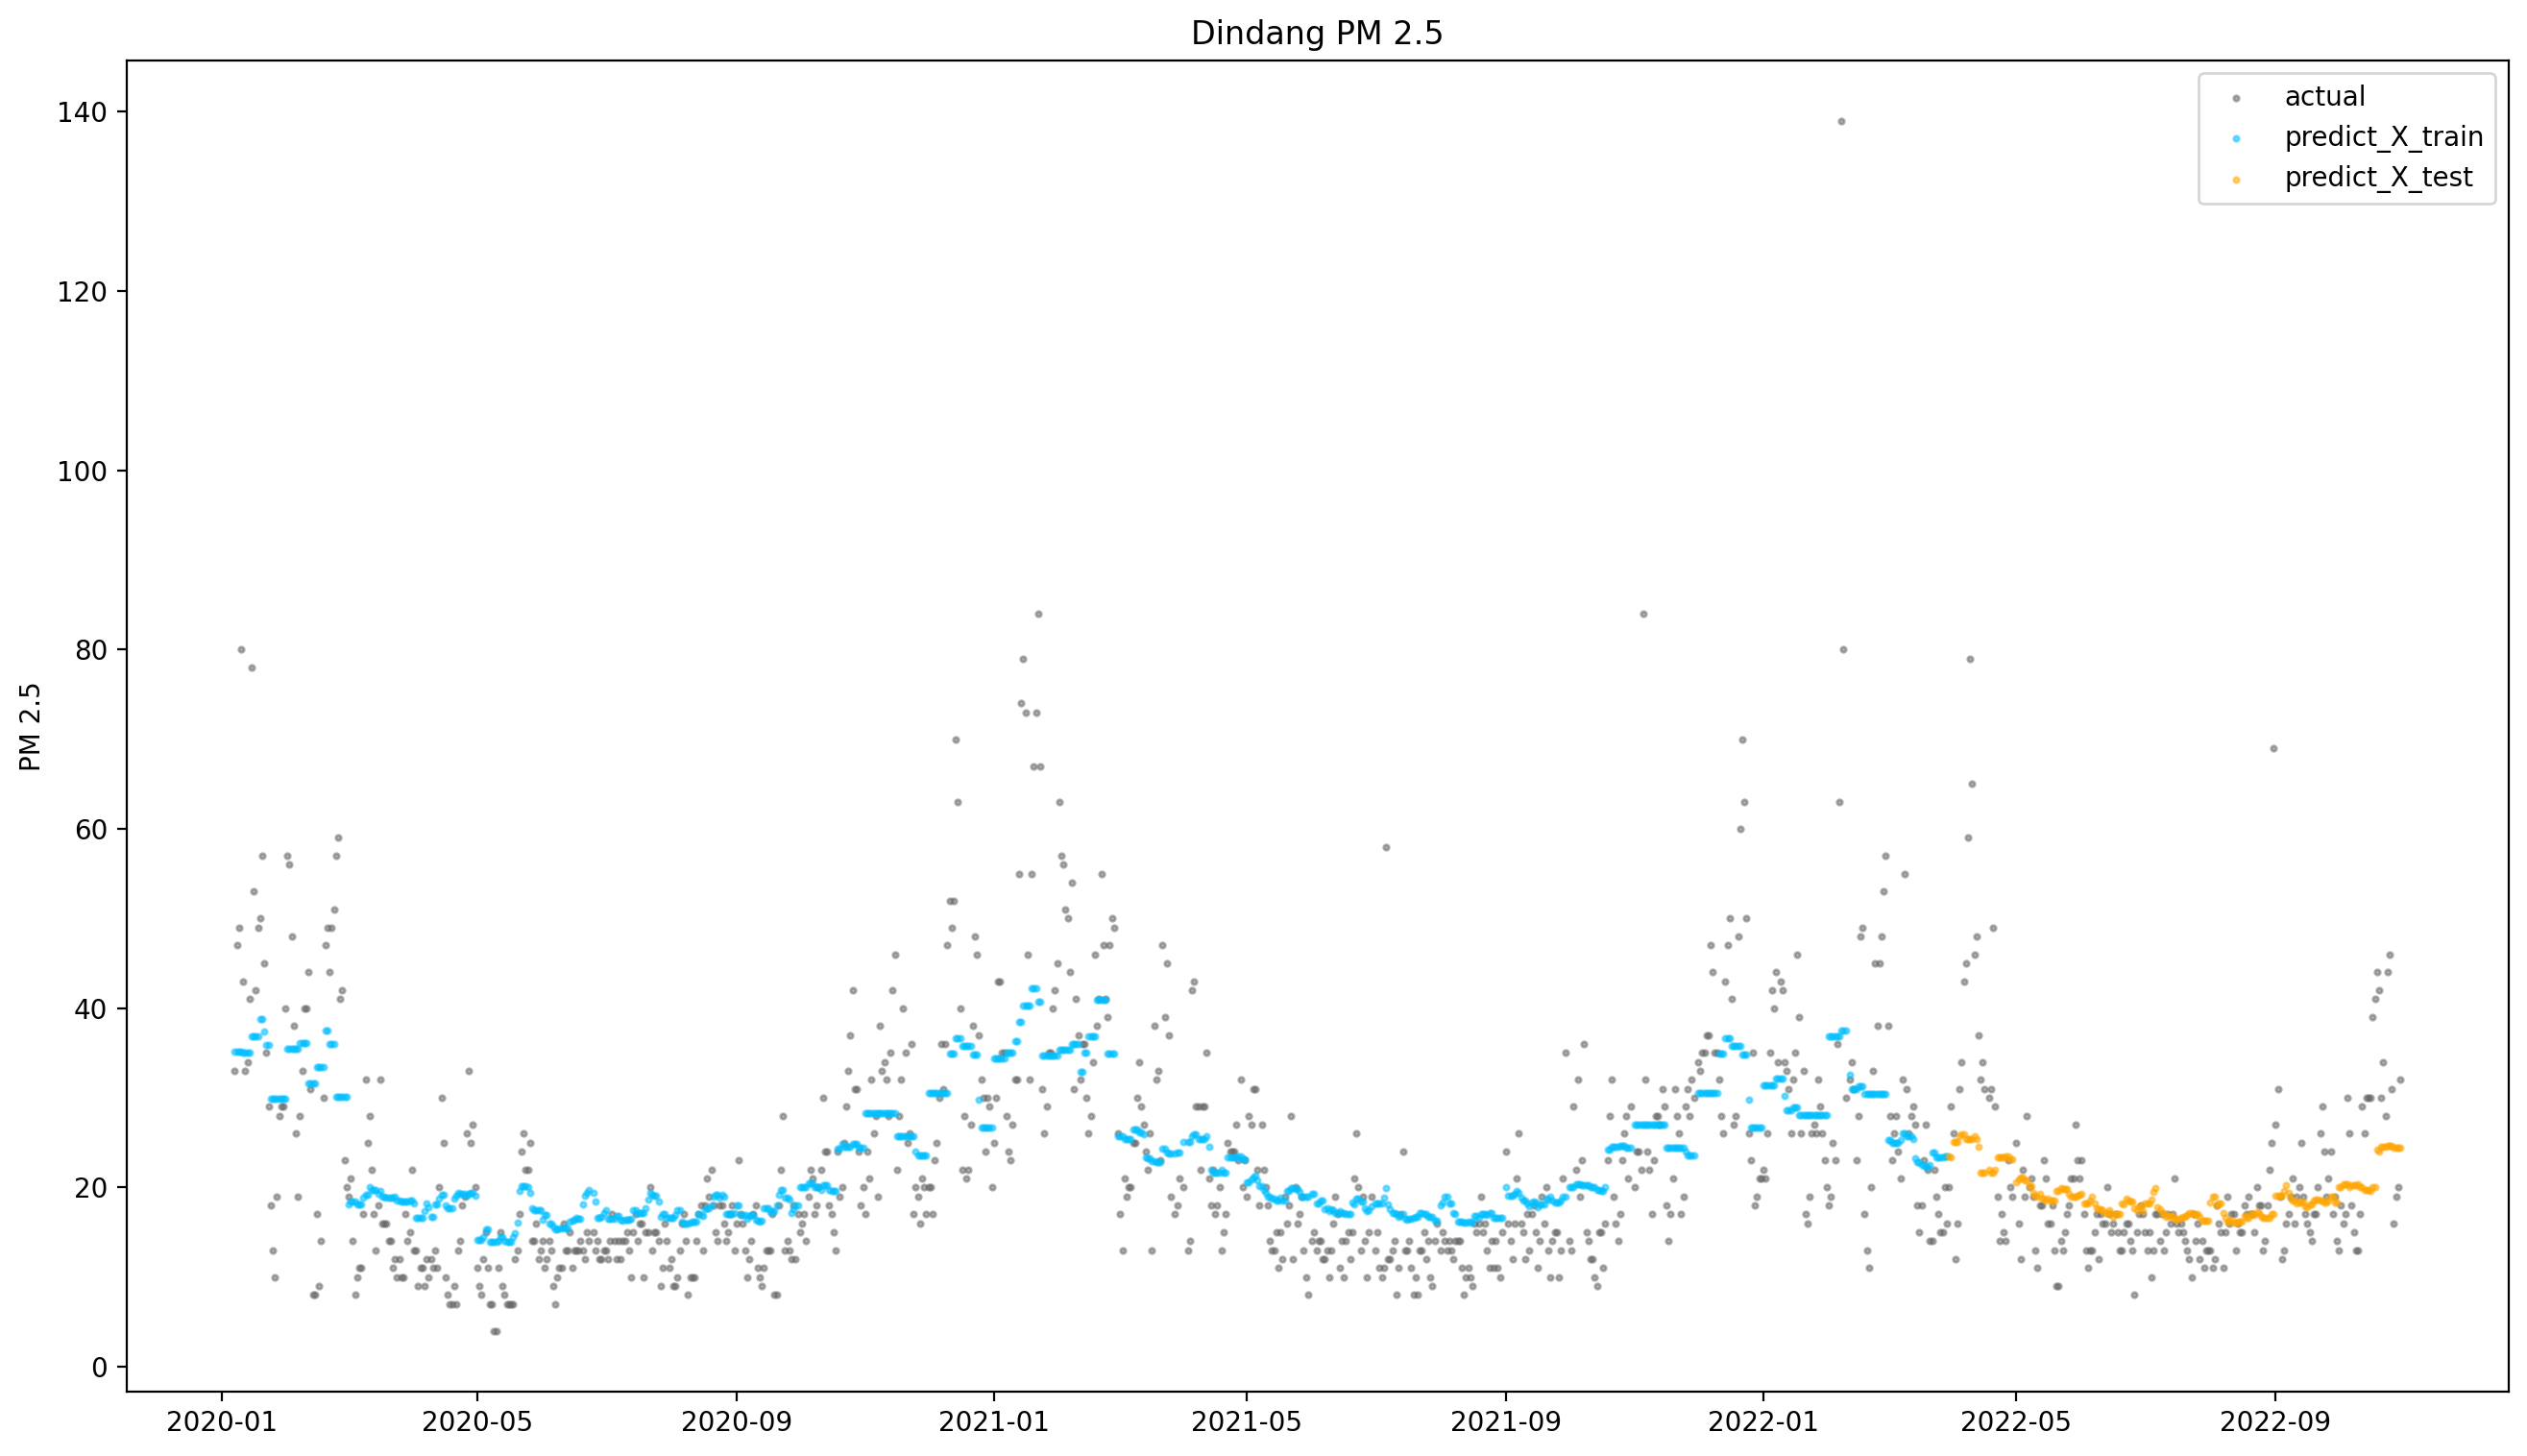

In [30]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Dindang PM 2.5')
plt.legend();

In [31]:
df.head(3000)

,year,month,day,day_name,pm25
date,,,,,
2020-01-07,2020,1,7,Tuesday,33.0
2020-01-08,2020,1,8,Wednesday,47.0
2020-01-09,2020,1,9,Thursday,49.0
2020-01-10,2020,1,10,Friday,80.0
2020-01-11,2020,1,11,Saturday,43.0
...,...,...,...,...,...
2022-10-26,2022,10,26,Wednesday,31.0
2022-10-27,2022,10,27,Thursday,16.0
2022-10-28,2022,10,28,Friday,19.0


In [32]:
yhat=[]

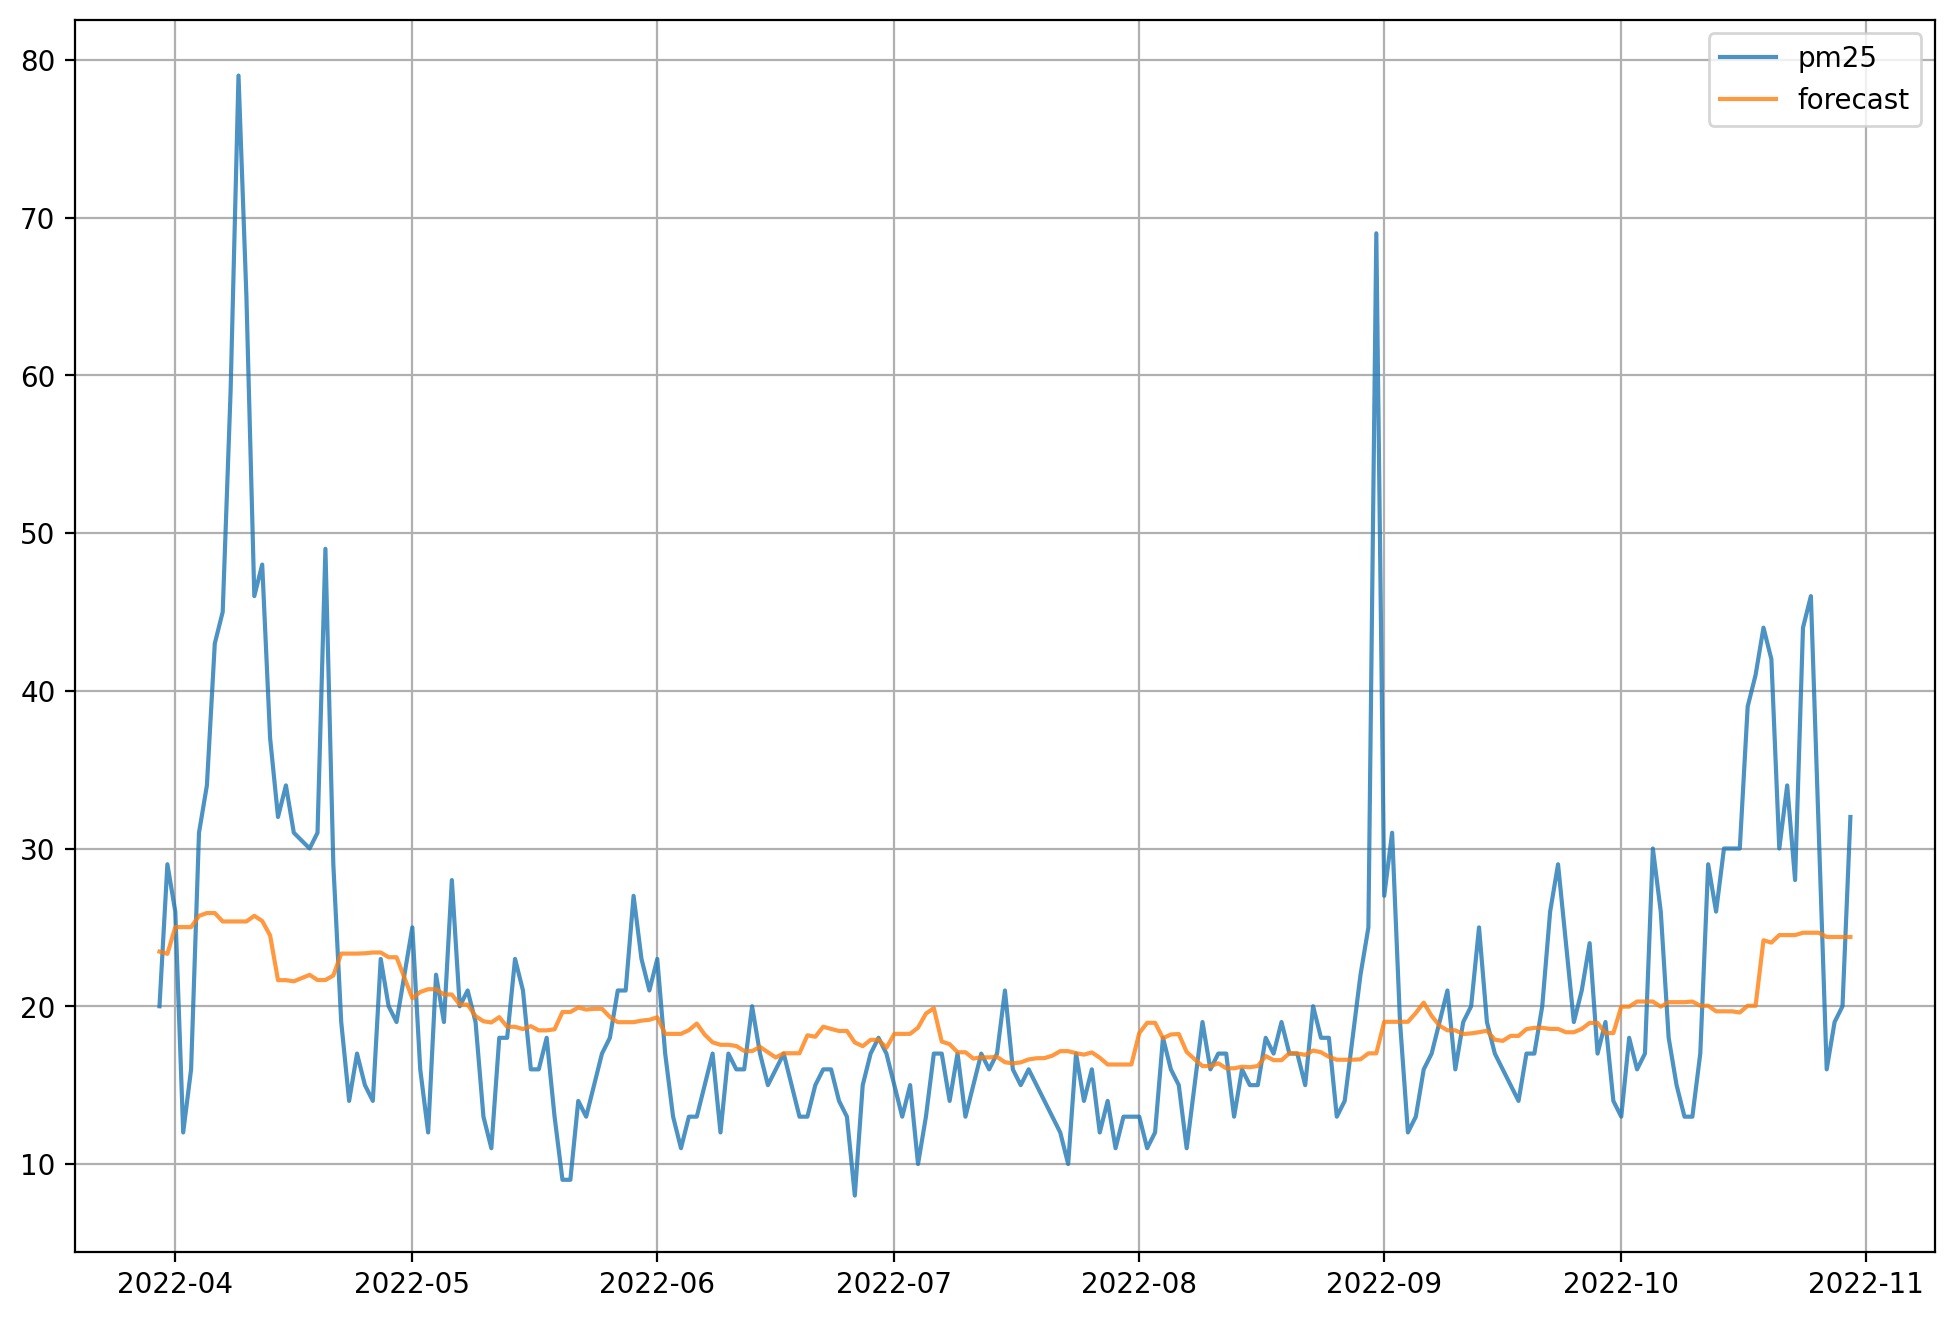

In [33]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [34]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(8)
ypred


,พยากรณ์ PM2.5
0,23.463593
1,23.324353
2,25.018027
3,25.018027
4,25.018027
5,25.732796
6,25.909327
7,25.909327


In [35]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0).head(8)
ypred

,พยากรณ์ PM2.5
0,23.0
1,23.0
2,25.0
3,25.0
4,25.0
5,26.0
6,26.0
7,26.0


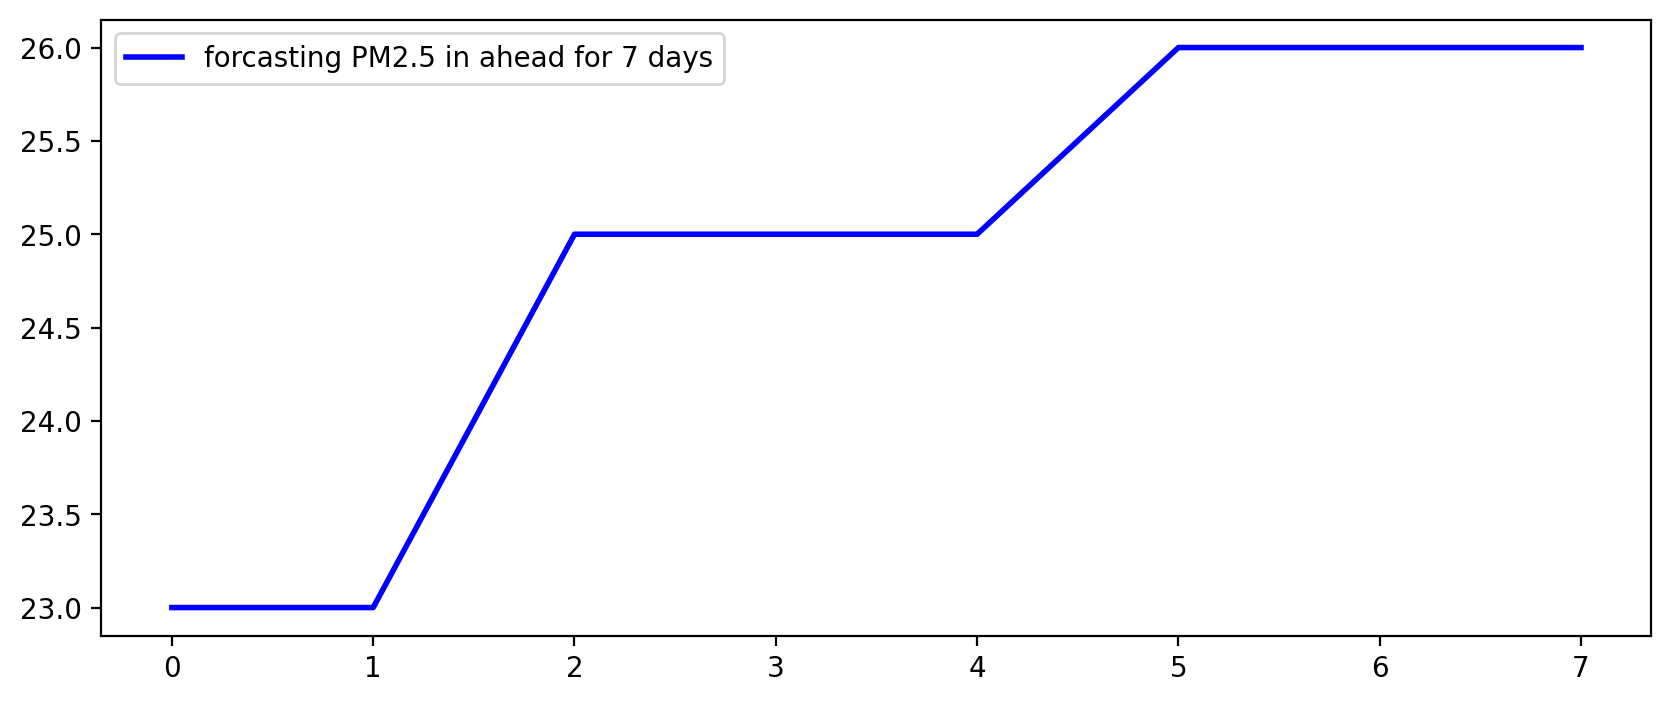

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(ypred, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [37]:
Y_pred=reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_pred,y_test)
print('MSE',mse)
rmse = np.sqrt(mse)
print('RMSE',rmse)

MSE 85.5333540743287
RMSE 9.248424410370054
